In [265]:
import pandas as pd
data=pd.read_csv("medical.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing:

## Analyzing:

### Relation between [age	,sex	,bmi	,children	,smoker	,region	] and charges:

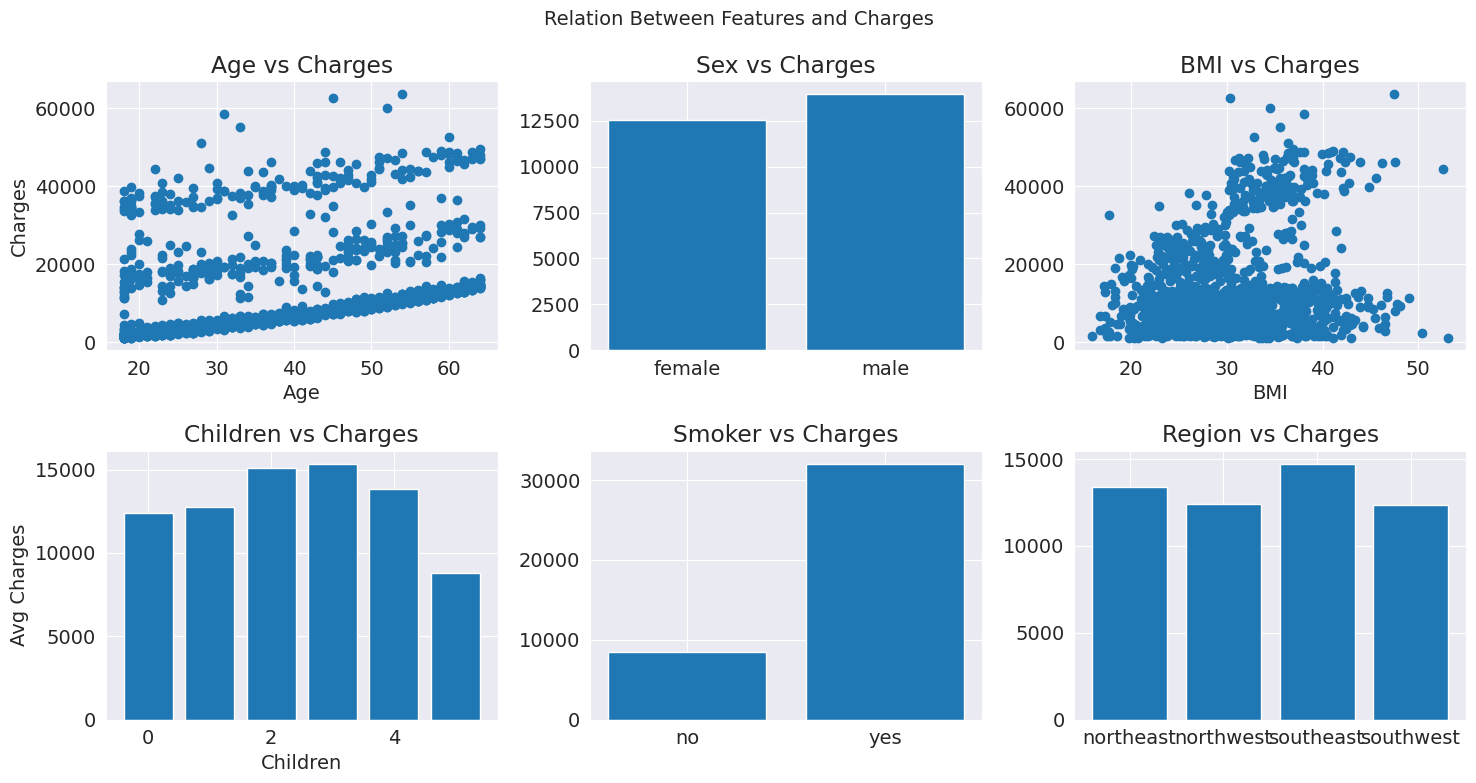

In [266]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# 1. Age vs Charges
ax[0,0].scatter(data['age'], data['charges'])
ax[0,0].set_title("Age vs Charges")
ax[0,0].set_xlabel("Age")
ax[0,0].set_ylabel("Charges")

# 2. Sex vs Charges (mean)
sex_mean = data.groupby("sex")["charges"].mean()
ax[0,1].bar(sex_mean.index, sex_mean.values)
ax[0,1].set_title("Sex vs Charges")

# 3. BMI vs Charges
ax[0,2].scatter(data['bmi'], data['charges'])
ax[0,2].set_title("BMI vs Charges")
ax[0,2].set_xlabel("BMI")

# 4. Children vs Charges (mean)
child_mean = data.groupby("children")["charges"].mean()
ax[1,0].bar(child_mean.index, child_mean.values)
ax[1,0].set_title("Children vs Charges")
ax[1,0].set_xlabel("Children")
ax[1,0].set_ylabel("Avg Charges")

# 5. Smoker vs Charges (mean)
smoker_mean = data.groupby("smoker")["charges"].mean()
ax[1,1].bar(smoker_mean.index, smoker_mean.values)
ax[1,1].set_title("Smoker vs Charges")

# 6. Region vs Charges (mean)
region_mean = data.groupby("region")["charges"].mean()
ax[1,2].bar(region_mean.index, region_mean.values)
ax[1,2].set_title("Region vs Charges")

fig.suptitle("Relation Between Features and Charges", fontsize=14)
plt.tight_layout()
plt.show()



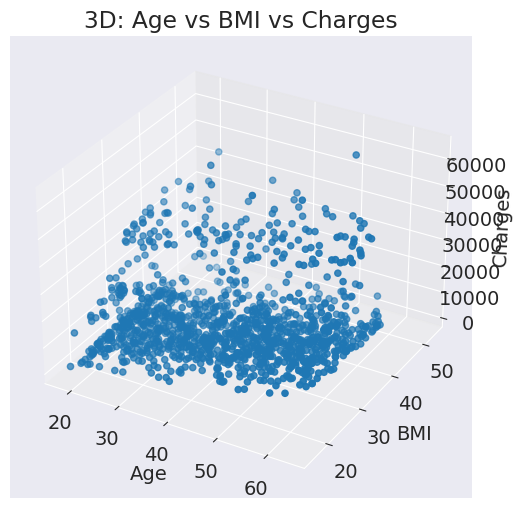

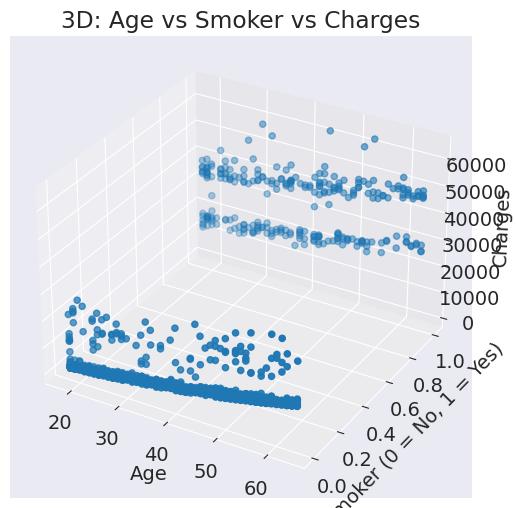

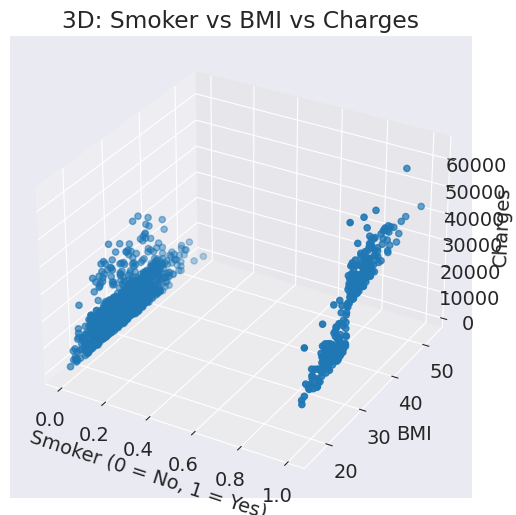

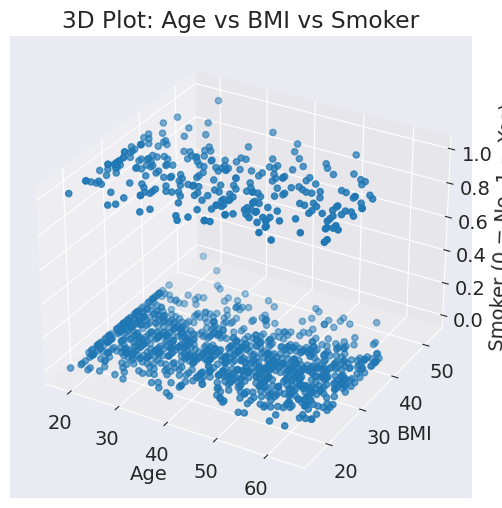

In [267]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
df=data.copy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['bmi'], df['charges']) # type: ignore

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Charges")
ax.set_title("3D: Age vs BMI vs Charges")

plt.show()

df['smoker_num'] = df['smoker'].map({'no': 0, 'yes': 1})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['smoker_num'], df['charges']) # type: ignore

ax.set_xlabel("Age")
ax.set_ylabel("Smoker (0 = No, 1 = Yes)")
ax.set_zlabel("Charges")
ax.set_title("3D: Age vs Smoker vs Charges")

plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['smoker_num'], df['bmi'], df['charges']) # type: ignore

ax.set_xlabel("Smoker (0 = No, 1 = Yes)")
ax.set_ylabel("BMI")
ax.set_zlabel("Charges")
ax.set_title("3D: Smoker vs BMI vs Charges")

plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# convert smoker to numeric
df['smoker_num'] = df['smoker'].map({'no': 0, 'yes': 1})

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['age'], df['bmi'], df['smoker_num']) # type: ignore

ax.set_xlabel("Age")
ax.set_ylabel("BMI")
ax.set_zlabel("Smoker (0 = No, 1 = Yes)")
ax.set_title("3D Plot: Age vs BMI vs Smoker")

plt.show()

## Encoding Categorical value:

In [268]:
df=data.copy()

In [269]:
from sklearn import preprocessing

In [270]:
# Labale encder:
lable_encoder=preprocessing.LabelEncoder()
df['sex']=lable_encoder.fit_transform(df['sex'])
df['smoker']=lable_encoder.fit_transform(df['smoker'])
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [271]:
# One hot encoding:
enc = preprocessing.OneHotEncoder()
enc.fit(df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [272]:
one_hot = enc.transform(df[['region']]).toarray() # type: ignore
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [273]:
df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [274]:
df.drop('region', axis=1, inplace=True)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


## Feature Scaling:

In [275]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [276]:
from sklearn.preprocessing import StandardScaler
Standard_Scaler=StandardScaler()
Df=df.copy()
Df[['age', 'bmi']]=Standard_Scaler.fit_transform(df[['age', 'bmi']])

In [277]:
Df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,-1.438764,0,-0.453320,0,1,16884.92400,0.0,0.0,0.0,1.0
1,-1.509965,1,0.509621,1,0,1725.55230,0.0,0.0,1.0,0.0
2,-0.797954,1,0.383307,3,0,4449.46200,0.0,0.0,1.0,0.0
3,-0.441948,1,-1.305531,0,0,21984.47061,0.0,1.0,0.0,0.0
4,-0.513149,1,-0.292556,0,0,3866.85520,0.0,1.0,0.0,0.0


In [278]:
Df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northeast',
       'northwest', 'southeast', 'southwest'],
      dtype='object')

In [279]:
X=Df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'southwest']]
y=Df[['charges']]

In [280]:
X

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
0,-1.438764,0,-0.453320,0,1,0.0,0.0,0.0,1.0
1,-1.509965,1,0.509621,1,0,0.0,0.0,1.0,0.0
2,-0.797954,1,0.383307,3,0,0.0,0.0,1.0,0.0
3,-0.441948,1,-1.305531,0,0,0.0,1.0,0.0,0.0
4,-0.513149,1,-0.292556,0,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.768473,1,0.050297,3,0,0.0,1.0,0.0,0.0
1334,-1.509965,0,0.206139,0,0,1.0,0.0,0.0,0.0
1335,-1.509965,0,1.014878,0,0,0.0,0.0,1.0,0.0
1336,-1.296362,0,-0.797813,0,0,0.0,0.0,0.0,1.0


In [281]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


## Spliting data:

In [282]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Machine Learning:

In [283]:
# Linear regression:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [284]:
# Model Training:
model.fit(X_train,y_train) 

LinearRegression()

In [285]:
y_pred = model.predict(X_test)

## Model evaluation

In [286]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R2  :", r2)


MAE : 4181.194473753653
MSE : 33596915.851361476
RMSE: 5796.284659276274
R2  : 0.7835929767120722


“The linear regression model achieved an R² score of 0.78, indicating that approximately 78% of the variation in insurance charges is explained by the selected features. The RMSE value of 5,796 shows a moderate prediction error, suggesting the model performs well but can be improved further.”

## Saving

In [287]:
import joblib
joblib.dump(model, "model.pkl")

joblib.dump(Standard_Scaler,"scaler.pkl")


['scaler.pkl']

# User input

In [288]:
# import joblib
# import numpy as np
# import pandas as pd

# # load trained model and scaler
# model = joblib.load("model.pkl")
# scaler = joblib.load("scaler.pkl")

# print("---- Insurance Charges Prediction ----")

# # take user inputs
# age = int(input("Enter age: "))
# sex = int(input("Enter sex (0 = Female, 1 = Male): "))
# bmi = float(input("Enter BMI: "))
# children = int(input("Enter number of children: "))
# smoker = input("Smoker? (yes/no): ").lower()
# region = input("Enter region (northeast/northwest/southeast/southwest): ").lower()

# # encode smoker
# smoker = 1 if smoker == "yes" else 0

# # scale age and bmi
# scaled = scaler.transform([[age, bmi]])
# age_scaled = scaled[0][0]
# bmi_scaled = scaled[0][1]

# # one-hot encode region
# northeast = northwest = southeast = southwest = 0
# if region == "northeast":
#     northeast = 1
# elif region == "northwest":
#     northwest = 1
# elif region == "southeast":
#     southeast = 1
# elif region == "southwest":
#     southwest = 1

# # final input as DataFrame (same order as training)
# final_input = pd.DataFrame([[age_scaled, sex, bmi_scaled, children, smoker,
#                               northeast, northwest, southeast, southwest]],
#                             columns=['age','sex','bmi','children','smoker',
#                                      'northeast','northwest','southeast','southwest'])

# # make prediction
# prediction = model.predict(final_input)

# # show result
# print("\nPredicted Insurance Charges:", round(float(prediction[0]), 2))
